# **Regresión lineal simple**

In [1]:
# Se importan las librerias a usar
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Entendiendo la Data

### `my2024-fuel-consumption-ratings.csv`:

Hemos descargado un conjuntos de datos proporcionan calificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos para la venta minorista en Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64); ahora Visualizamos los datos del DataFrame después de cargar el CSV para un primer análisis.



In [2]:
# Se importa el archivo
df = pd.read_csv('../Emisiones_co2_regre_simple/my2024-fuel-consumption-ratings.csv', encoding='latin1', delimiter=',')

# visualizamos el df
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


 Para entender mejor los datos realizamos una EDA

In [81]:
# Generamos estadísticas descriptivas para todas las columnas, incluyendo datos de tipo objeto.
df.describe(include='all')

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,743.0,743,743,743,743.000000,743.000000,743,743,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
unique,NaN,39,593,13,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Chevrolet,Silverado 4WD,Sport utility vehicle: Small,NaN,NaN,AS8,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,61,4,180,NaN,NaN,183,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2024.0,NaN,NaN,NaN,3.083176,5.528937,NaN,NaN,12.386676,9.427995,11.055989,27.388964,258.803499,4.488560,5.477793
std,0.0,NaN,NaN,NaN,1.269272,1.883797,NaN,NaN,3.396299,2.323192,2.857385,7.765654,65.117448,1.310158,1.614199
min,2024.0,NaN,NaN,NaN,1.200000,3.000000,NaN,NaN,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,NaN,NaN,NaN,2.900000,6.000000,NaN,NaN,12.200000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,NaN,NaN,NaN,3.600000,6.000000,NaN,NaN,14.500000,10.800000,12.700000,31.000000,299.000000,5.000000,7.000000


In [82]:
# Verificamos el tipo de dato en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            743 non-null    int64  
 1   Make                  743 non-null    object 
 2   Model                 743 non-null    object 
 3   Vehicle class         743 non-null    object 
 4   Engine size (L)       743 non-null    float64
 5   Cylinders             743 non-null    int64  
 6   Transmission          743 non-null    object 
 7   Fuel type             743 non-null    object 
 8   City (L/100 km)       743 non-null    float64
 9   Highway (L/100 km)    743 non-null    float64
 10  Combined (L/100 km)   743 non-null    float64
 11  Combined (mpg)        743 non-null    int64  
 12  CO2 emissions (g/km)  743 non-null    int64  
 13  CO2 rating            743 non-null    int64  
 14  Smog rating           743 non-null    int64  
dtypes: float64(4), int64(6)

Verificamos si tenemos datos duplicados

In [83]:
# Contamos los valores duplicados
df.duplicated().value_counts()

False    743
Name: count, dtype: int64

Graficamos algunas columnas para comprender mejor la información que contienen y encontrar posibles relaciones.

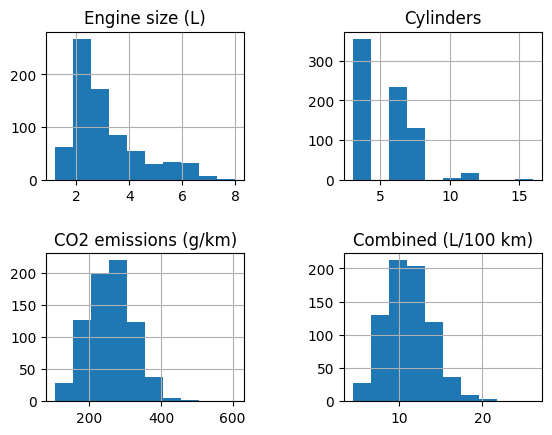

In [84]:
# Seleccionamos las columnas a usar para la visualización
vis = df[['Engine size (L)', 'Cylinders',  'CO2 emissions (g/km)', 'Combined (L/100 km)']]
# Creamos los histogramas
vis.hist()
# Ajustamos el espaciado entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
# Mostramos los gráficos
plt.show()

Ahora, grafiquemos cada una de estas características frente a la Emisión, para ver cuán lineal es su relación:

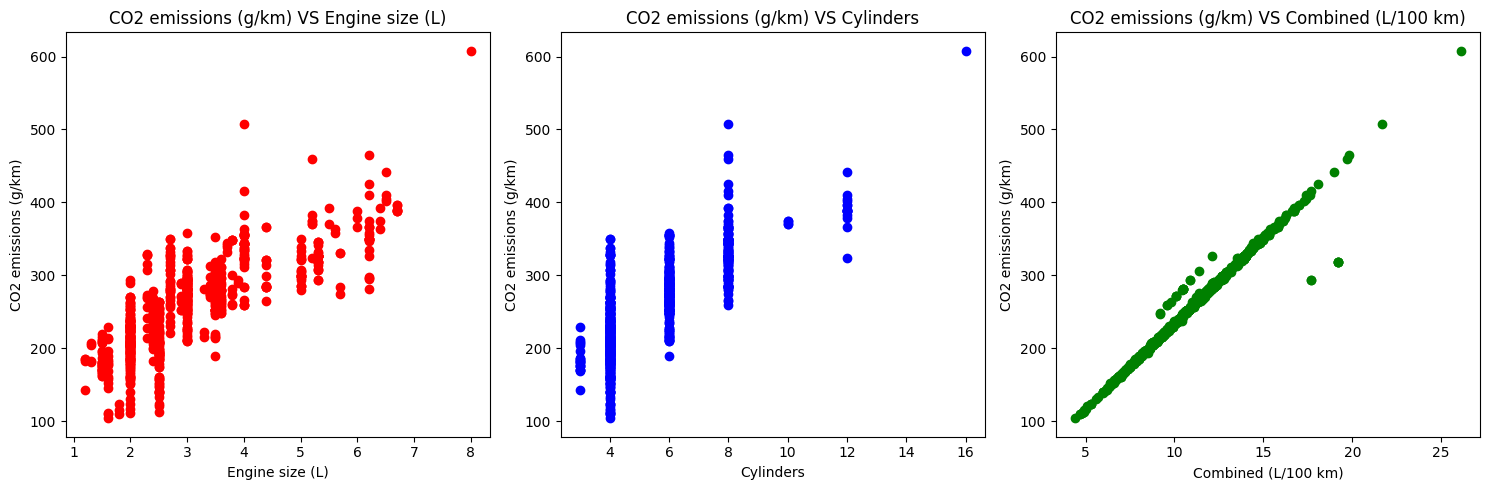

In [85]:
# Crear una figura y ejes para los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: 'Engine size (L)' vs 'CO2 emissions (g/km)'
axes[0].scatter(vis['Engine size (L)'], vis['CO2 emissions (g/km)'], color='red')
axes[0].set_xlabel('Engine size (L)')
axes[0].set_ylabel('CO2 emissions (g/km)')
axes[0].set_title('CO2 emissions (g/km) VS Engine size (L)')

# Gráfico 2: 'Cylinders' vs 'CO2 emissions (g/km)'
axes[1].scatter(vis['Cylinders'], vis['CO2 emissions (g/km)'], color='blue')
axes[1].set_xlabel('Cylinders')
axes[1].set_ylabel('CO2 emissions (g/km)')
axes[1].set_title('CO2 emissions (g/km) VS Cylinders')

# Gráfico 3: 'Smog rating' vs 'CO2 emissions (g/km)'
axes[2].scatter(vis['Combined (L/100 km)'], vis['CO2 emissions (g/km)'], color='green')
axes[2].set_xlabel('Combined (L/100 km)')
axes[2].set_ylabel('CO2 emissions (g/km)')
axes[2].set_title('CO2 emissions (g/km) VS Combined (L/100 km)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Se evidencian las relaciones entre las características (Engine size, Cylinders, Combined (L/100 km)) y las emisiones de CO2







Verificamos outliers

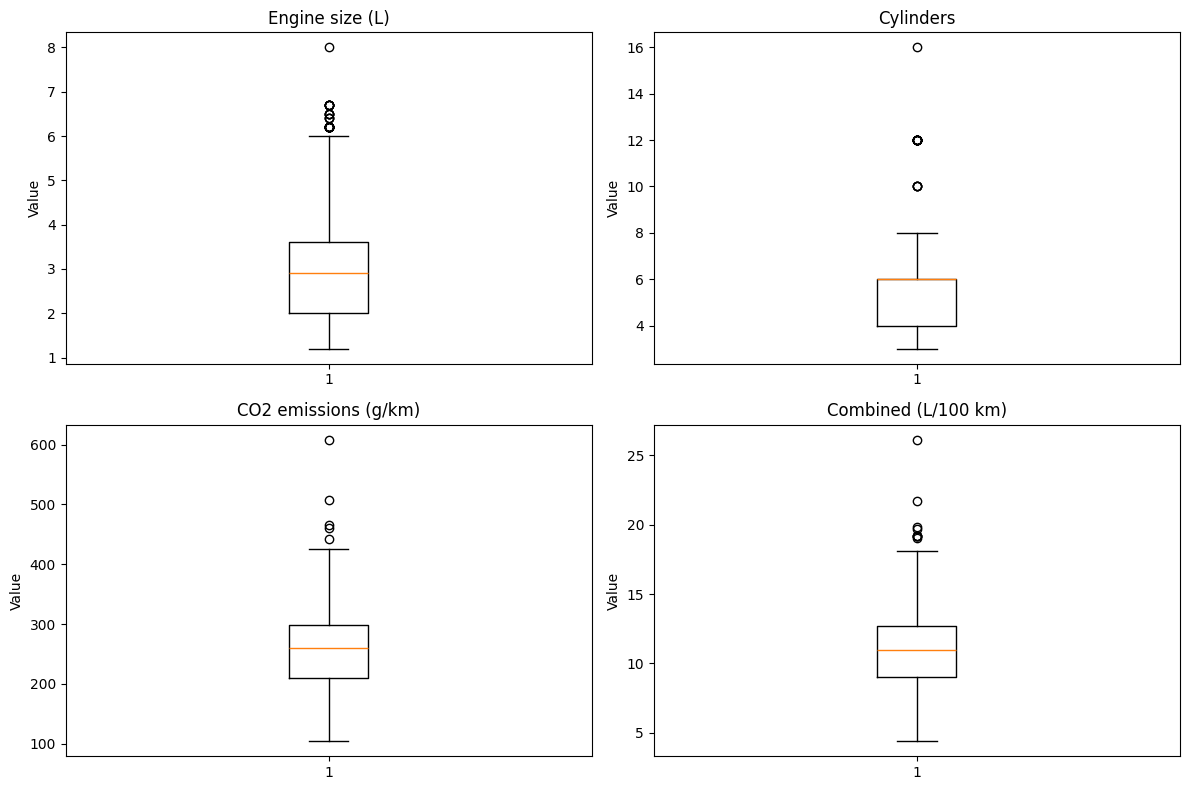

In [86]:
# Crear un diagrama de caja para cada variable
plt.figure(figsize=(12, 8))

# Boxplot para Engine size (L)
plt.subplot(2, 2, 1)
plt.boxplot(vis['Engine size (L)'])
plt.title('Engine size (L)')
plt.ylabel('Value')

# Boxplot para Cylinders
plt.subplot(2, 2, 2)
plt.boxplot(vis['Cylinders'])
plt.title('Cylinders')
plt.ylabel('Value')

# Boxplot para CO2 emissions (g/km)
plt.subplot(2, 2, 3)
plt.boxplot(vis['CO2 emissions (g/km)'])
plt.title('CO2 emissions (g/km)')
plt.ylabel('Value')

# Boxplot para Combined (L/100 km)
plt.subplot(2, 2, 4)
plt.boxplot(vis['Combined (L/100 km)'])
plt.title('Combined (L/100 km)')
plt.ylabel('Value')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()



Se observa algunos valores atípicos (outliers) en estas características que pueden ser explicados por la naturaleza de los vehículos de mayor tamaño. Ahora dividamos nuestro conjunto de datos en conjuntos de entrenamiento y de prueba. El 80% de todo el conjunto de datos se utilizará para entrenamiento y el 20% para pruebas. Creamos una máscara para seleccionar filas aleatorias usando la función

In [87]:
# Seleccionar la variable independiente (X) y la variable dependiente (y)
X = vis[['Engine size (L)']]  # Variable independiente
y = vis['CO2 emissions (g/km)']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
precision = r2_score(y_test, y_pred)

# Imprimir los coeficientes y el intercepto del modelo
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Imprimir la precisión del modelo
print(f"Precisión del modelo: {precision}")


Coefficients:  [40.84829592]
Intercept:  132.4241275620993
Precisión del modelo: 0.6463396390005689


El coeficiente es aproximadamente 40.84829592, lo que significa que, en promedio, por cada aumento unitario en 'Engine size (L)', se espera un aumento de aproximadamente 40.85 en 'CO2 emissions (g/km)' (siendo todas las demás variables constantes).
El intercepto es aproximadamente 132.4241275620993, lo que significa que cuando 'Engine size (L)' es cero, se espera que 'CO2 emissions (g/km)' sea de aproximadamente 132.42.
La precisión del modelo (R²) es aproximadamente 0.6463396390005689, lo que indica que el modelo explica alrededor del 64.63% de la variabilidad de las emisiones de CO2 basándose en el tamaño del motor.

Graficamos la recta

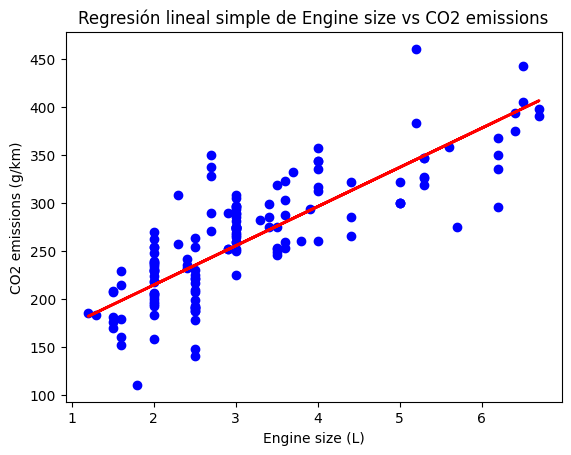

In [88]:
# Graficar los puntos de prueba (azul) y la línea de regresión (rojo)
plt.scatter(X_test, y_test, color='blue')  # Puntos de prueba
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Línea de regresión
plt.xlabel('Engine size (L)')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Regresión lineal simple de Engine size vs CO2 emissions')
plt.show()

Con este modelo podemos predecir las emisiones de CO2 basándose en el tamaño del motor, entrena un modelo con los datos de entrenamiento, lo prueba con los datos de prueba y evalúa su precisión.

Ahora provamos con las otras dos variables

In [89]:
X = vis[['Cylinders']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
precision = r2_score(y_test, y_pred)

# Imprimir los coeficientes y el intercepto del modelo
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Imprimir la precisión del modelo
print(f"Precisión del modelo: {precision}")


Coefficients:  [27.68387612]
Intercept:  105.24142921393042
Precisión del modelo: 0.6531702234588121


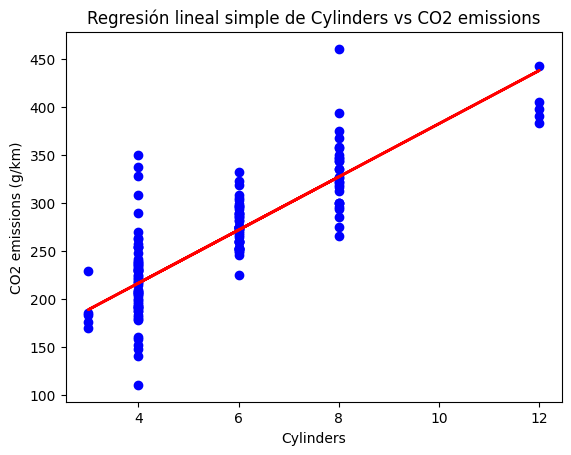

In [90]:
# Graficar los puntos de prueba (azul) y la línea de regresión (rojo)
plt.scatter(X_test, y_test, color='blue')  # Puntos de prueba
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Línea de regresión
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Regresión lineal simple de Cylinders vs CO2 emissions')
plt.show()


En este caso, la variable 'Cylinders' muestra un comportamiento similar a 'Engine size (L)' en relación con las emisiones de CO2.

In [91]:
X = vis[['Combined (L/100 km)']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
precision = r2_score(y_test, y_pred)

# Imprimir los coeficientes y el intercepto del modelo
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

# Imprimir la precisión del modelo
print(f"Precisión del modelo: {precision}")

Coefficients:  [22.39056371]
Intercept:  11.152750061189295
Precisión del modelo: 0.9633391297519814


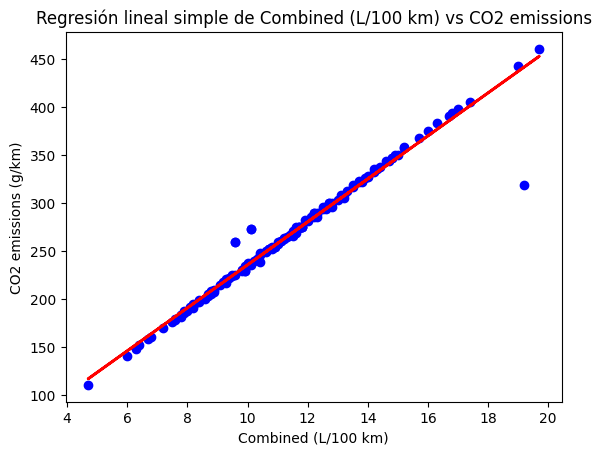

In [92]:
# Graficar los puntos de prueba (azul) y la línea de regresión (rojo)
plt.scatter(X_test, y_test, color='blue')  # Puntos de prueba
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Línea de regresión
plt.xlabel('Combined (L/100 km)')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Regresión lineal simple de Combined (L/100 km) vs CO2 emissions')
plt.show()

El modelo muestra una alta precisión al utilizar la variable 'Combined (L/100 km)', con un R² de aproximadamente 0.963. Esto significa que alrededor del 96.3% de la variabilidad en las emisiones de CO2 se explica mediante el consumo combinado de combustible. Es importante destacar que el cálculo del consumo combinado puede depender de varias variables, como el tamaño del motor, el número de cilindros, entre otros, lo que permite una predicción tan precisa de las emisiones de CO2. Los coeficientes y el intercepto del modelo también se han calculado e impresos.